# BIVARIATE ANALYSIS
- 2 variable

* **Numerical (Continuous) vs. Categorical**

In [22]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# We load the pickle file so we have the correct data type

# df = pd.read_pickle('data_MPG_clean.pkl')

# or use csv file
df = pd.read_csv('data_MPG.csv')

In [24]:
# print 10 sample values to identify numerical , categorical columns

print(df.sample(10))

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
62   13.0          8         350.0       165.0    4274          12.0   
58   25.0          4          97.5        80.0    2126          17.0   
311  32.1          4          98.0        70.0    2120          15.5   
331  33.8          4          97.0        67.0    2145          18.0   
282  22.3          4         140.0        88.0    2890          17.3   
151  31.0          4          79.0        67.0    2000          16.0   
10   15.0          8         383.0       170.0    3563          10.0   
257  19.4          6         232.0        90.0    3210          17.2   
285  17.0          8         305.0       130.0    3840          15.4   
339  26.6          4         151.0        84.0    2635          16.4   

     model_year  origin                       name  
62           72     usa           chevrolet impala  
58           72     usa         dodge colt hardtop  
311          80     usa         chevrolet chevet

In [25]:
# We can also check for categorical columns using info():
# float and int are indicators of numerical columns

print(df.info(memory_usage="deep"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 74.0 KB
None


# Categorical and Numerical columns

In [41]:
# Identify categorical columns
# step1: identify number of unique values in each column
print(df.nunique())

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [47]:
# step2: Based on the count, it seems that [ "cylinders", "model_year", "origin" ] are categorical
# lets see their unique values

print(df['cylinders'].unique())
print(df['model_year'].unique())
print(df['origin'].unique())

[8 4 6 3 5]
[70 71 72 73 74 75 76 77 78 79 80 81 82]
['usa' 'japan' 'europe']


### Conclusion
- categorical : ["origin", "cylinders", "model_year"]
- numerical   : ["mpg", "displacement", "horsepower", "weight", "acceleration"]

# boxplot

In [26]:
# Optional: Set palette and font for title, labels, etc

plt.style.use("dark_background")  
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=["gold"])
plt.rcParams.update({
    "font.size": 14,
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
    "lines.linewidth": 2.5
})


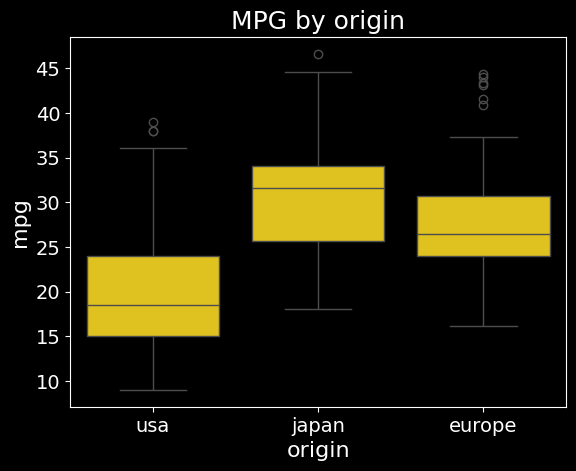

In [27]:
# step1: Here categorical column is origin: mpg vs origin

col = "origin"

sns.boxplot(data=df, x=col, y='mpg')
plt.title(f'MPG by {col}')
plt.show()

# Observation:
- Japanese cars generally have higher mpg
- US cars have lower mpg on average

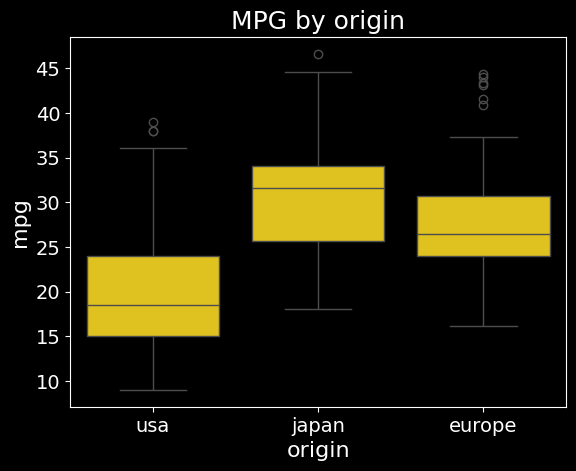

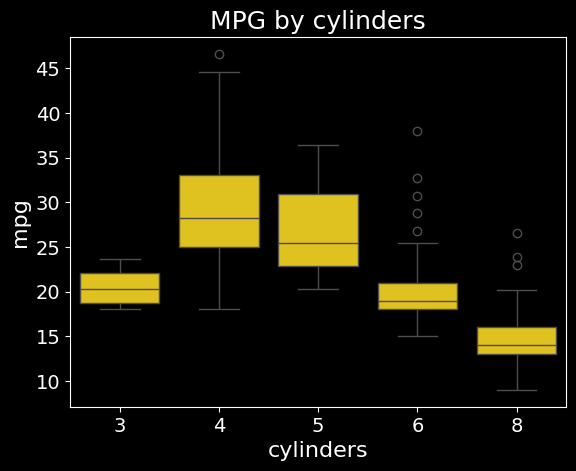

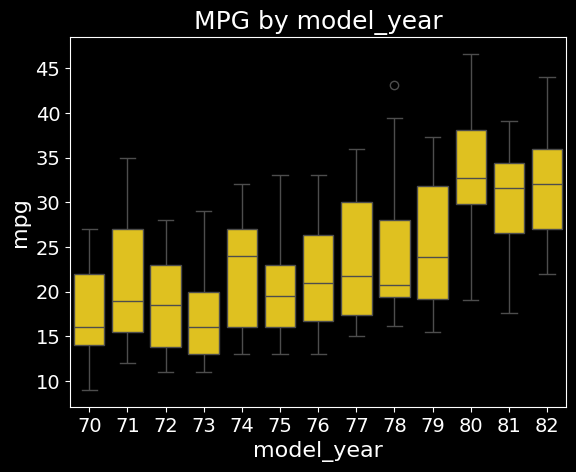

In [28]:
# step2: Now do MPG vs ["origin", "cylinders", "model_year"]

columns = ["origin", "cylinders", "model_year"]

for col in columns:
    sns.boxplot(data=df, x=col, y='mpg')
    plt.title(f'MPG by {col}')
    plt.show()

# Observation:
- MPG is highest when cylinders=4
- MPG is lowest when cylinders=8
- MPG vs model_year: The mpg has gone up with years


# Trend using lineplot

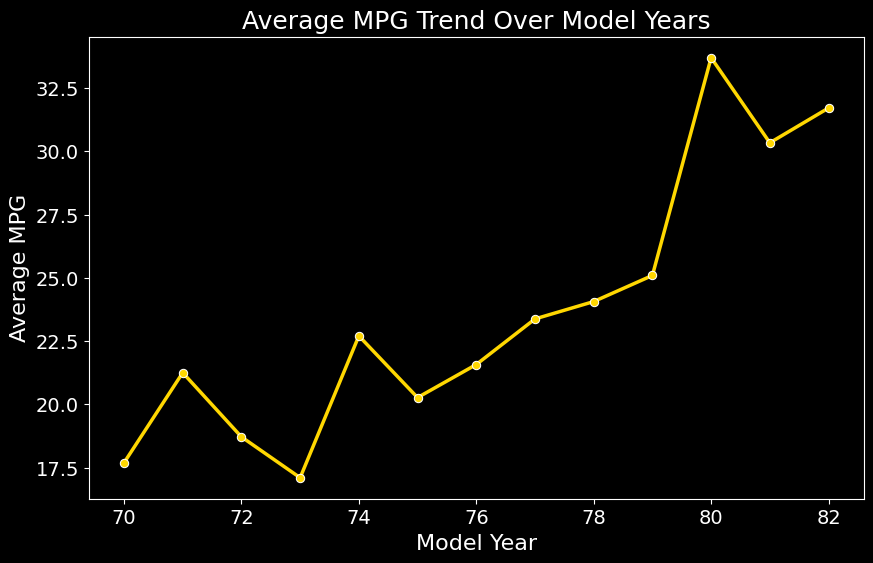

In [29]:
# step1: Trend of MPG over the years: mpg vs model_year

# Group by model_year and take mean mpg
yearly_trend = df.groupby("model_year")["mpg"].mean().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(x="model_year", y="mpg", data=yearly_trend, marker="o")

plt.title("Average MPG Trend Over Model Years")
plt.xlabel("Model Year")
plt.ylabel("Average MPG")
plt.show()

# observation: 
- average MPG has increasing trend

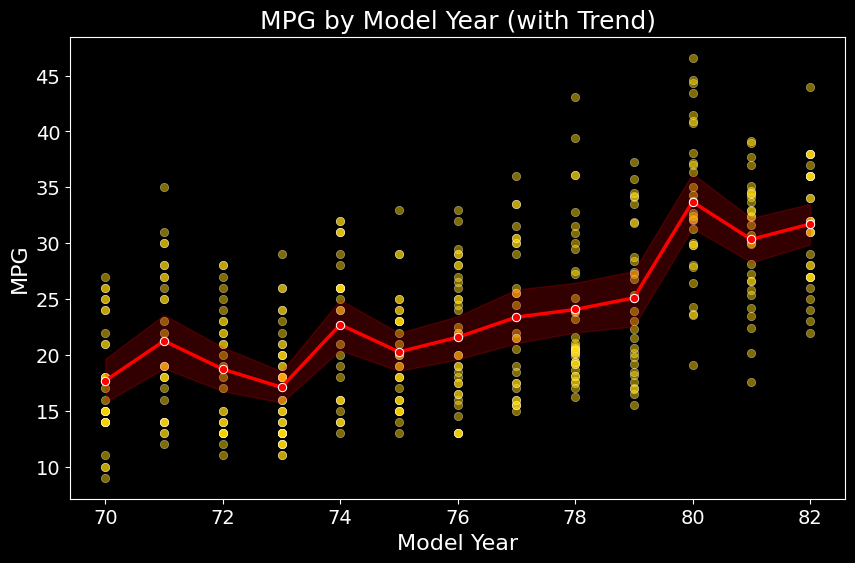

In [30]:
# step2: Lets add more info to trend of MPG over the years

plt.figure(figsize=(10,6))
sns.scatterplot(x="model_year", y="mpg", data=df, alpha=0.5) # ADDED
sns.lineplot(x="model_year", y="mpg", data=df, estimator="mean", color="red", marker="o")

plt.title("MPG by Model Year (with Trend)")
plt.xlabel("Model Year")
plt.ylabel("MPG")
plt.show()

# observation: 
- Each point = a car.
- Red line = average mpg trend.

# Use Violin Plot (Distribution + Density)

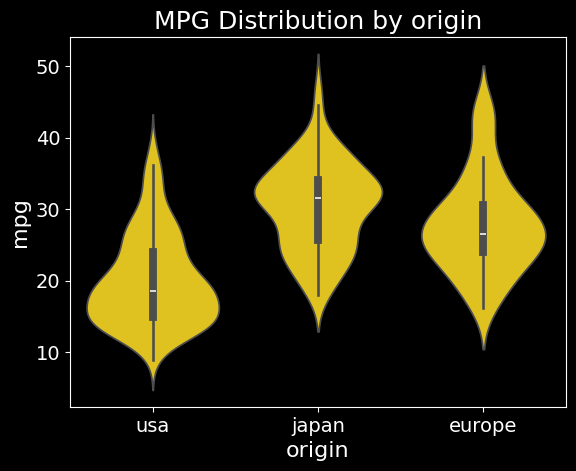

In [31]:
# origin vs mpg 

col = "origin"

sns.violinplot(data=df, x=col, y='mpg')

plt.title(f'MPG Distribution by {col}')
plt.show()

# Observation: 
- Japan cars have better MPG
- For USA, most cars have MPG between 13 to 25 (guestimate)

# Swarm plot

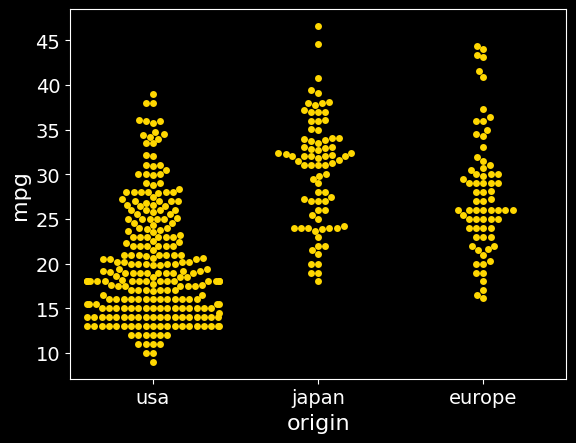

In [32]:
# origin vs mpg

col = "origin"

sns.swarmplot(data=df, x=col, y='mpg', s=5)

plt.show()

# Observation:
- More data from US cars
- mpg is low for US cars, and high for Japan cars

# Grouped Statistics using groupby

In [33]:
# origin vs mpg: mean values of mpg grouped by origin
grouped_mean = df.groupby('origin')['mpg'].mean()

print(grouped_mean)

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64


## Multiple statistics at once

In [34]:
# origin vs mpg

grouped_agg = df.groupby('origin')['mpg'].agg(
    mean_mpg='mean',
    median_mpg='median',
    min_mpg='min',
    max_mpg='max',
    std_mpg='std',
    count='count'
)

print(grouped_agg)

         mean_mpg  median_mpg  min_mpg  max_mpg   std_mpg  count
origin                                                          
europe  27.891429        26.5     16.2     44.3  6.723930     70
japan   30.450633        31.6     18.0     46.6  6.090048     79
usa     20.083534        18.5      9.0     39.0  6.402892    249


# Describe numerical variable grouped by category

In [37]:
# origin vs mpg

print(df.groupby('origin')['mpg'].describe())

        count       mean       std   min   25%   50%    75%   max
origin                                                           
europe   70.0  27.891429  6.723930  16.2  24.0  26.5  30.65  44.3
japan    79.0  30.450633  6.090048  18.0  25.7  31.6  34.05  46.6
usa     249.0  20.083534  6.402892   9.0  15.0  18.5  24.00  39.0


# Bar plot with 95% confidence interval (mean)

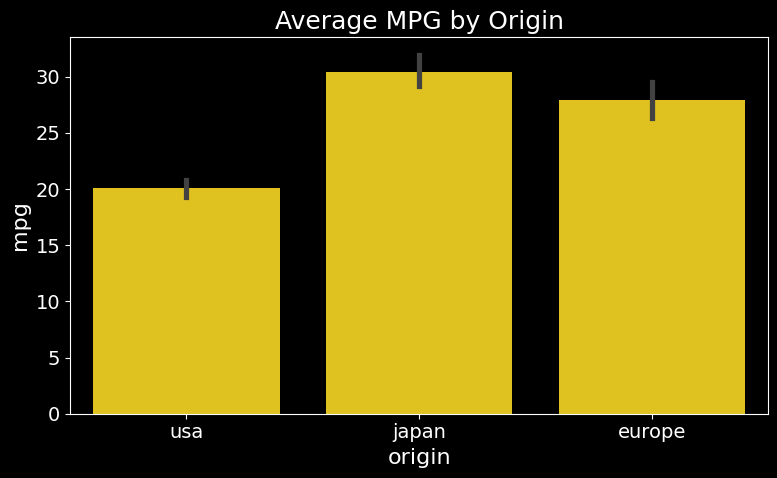

In [38]:
# origin vs mpg

plt.figure(figsize=(8, 5))
sns.barplot(
    data=df,
    x='origin',
    y='mpg',
    estimator='mean'
)

plt.title("Average MPG by Origin")
plt.tight_layout()
plt.show()